# A Language Identifier

## The architecture of this project is:
    - Implementing a pre-trained model
    - Deploying the model as an API
    - Connecting the API to your main application
    
We can construct a language identifier with the fastText model by Facebook. 
The model is an extension of the word2vec tool and uses word embeddings to understand a language.

# About the dataset

We are using the Language Detection dataset, which contains text details for 17 different languages.

Languages are:
English, Portuguese, French, Greek, Dutch, Spanish, Japanese, Russian, Danish, Italian, Turkish, Swedish, Arabic, Malayalam, Hindi , Tamil, Telugu

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [2]:
#to import the dataset
#data = pd.read_csv("Language Detection.csv")
data = pd.read_csv("Language Detection.csv")
data.head(9000)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
...,...,...
8995,[21] على الرغم من أن ويكيبيديا الإنجليزية وصلت...,Arabic
8996,[22] تمت إضافة حوالي 1800 مقال يوميًا إلى المو...,Arabic
8997,[23] عزا فريق في مركز بالو ألتو للأبحاث هذا ال...,Arabic
8998,[24] يقترح البعض الآخر أن النمو يتم تسويته بشك...,Arabic


In [3]:
#to count the value of each language
data["Language"].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [4]:
#Separating Independent and Dependent features
x = data['Text']
y = data['Language']

## Label Encoding
Our output variable, the name of languages is a categorical variable. 
For training the model we have to convert it into a numerical form,

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

## Text Preprocessing

In [6]:
# creating a list for appending the preprocessed text
data_list = []
# iterating through all the text
for text in x:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),"%^*?:;~`0-9]', '', text)
        text = re.sub(r'[[]]', ' ', text)
        # converting the text to lower case
        text = text.lower()
        # appending to data_list
        data_list.append(text)

In [7]:
print(x.head(1))
print(data_list[0])

0     Nature, in the broadest sense, is the natural...
Name: Text, dtype: object
 nature in the broadest sense is the natural physical material world or universe.


## Bag of Words

As we all know that, not only the output feature but also the input feature should be of the numerical form. 
So we are converting text into numerical form by creating a Bag of Words model using CountVectorizer.

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(data_list).toarray()
x.shape 

(10337, 39412)

## Train Test Splitting

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

## Model Training and Prediction

In [10]:
#we're going to use the Naive Bayes algorithm for the model training
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [11]:
# we’ve trained our model using the training set. Now let’s predict the output for the test set.
y_pred = model.predict(x_test)

## Model Evaluation

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy is :",ac)

Accuracy is : 0.9806576402321083


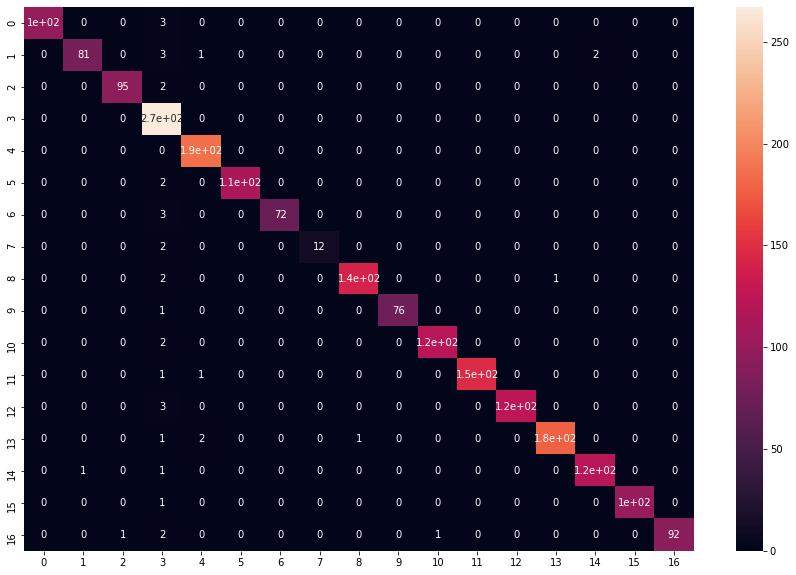

In [13]:
#plot the confusion matrix
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

## Predicting with more data

In [14]:
def predict(text):
     x = cv.transform([text]).toarray() # converting text to bag of words model (Vector)
     lang = model.predict(x) # predicting the language
     lang = le.inverse_transform(lang) # finding the language corresponding the the predicted value
     print("The langauge is in",lang[0]) # printing the language

In [18]:
t = input("Enter a text: ")
predict(t)

Enter a text: école
The langauge is in French
